### Support Vector Classifier Implementation

In [260]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [261]:
# Lets create synthetic data points
from sklearn.datasets import make_classification

In [262]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,
                        n_clusters_per_class=2,n_redundant=0,random_state=42)

In [263]:
X

array([[-0.99910178, -0.66386   ],
       [ 1.24668618,  1.15359685],
       [ 0.96277683,  0.85939747],
       ...,
       [-0.10126746, -1.59017563],
       [ 0.64376105, -0.78053855],
       [ 0.69852984, -1.27940455]], shape=(1000, 2))

In [264]:
y

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,

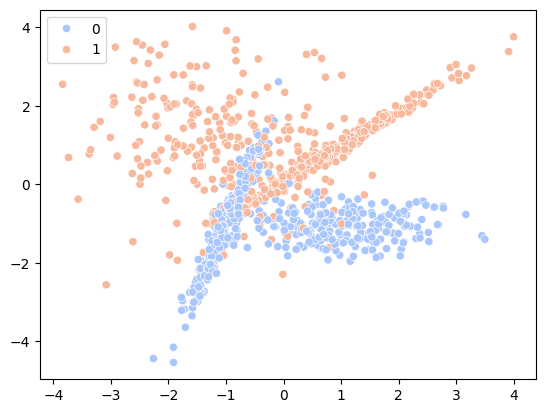

In [265]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette="coolwarm")
plt.show()

In [266]:
# Convert X to DataFrame for easier plotting
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

df.head()

,Feature 1,Feature 2,Target
0,-0.999102,-0.663860,1
1,1.246686,1.153597,1
2,0.962777,0.859397,1
3,-2.957441,2.033645,1
4,1.141165,1.059449,1


<Axes: xlabel='Feature 1', ylabel='Feature 2'>

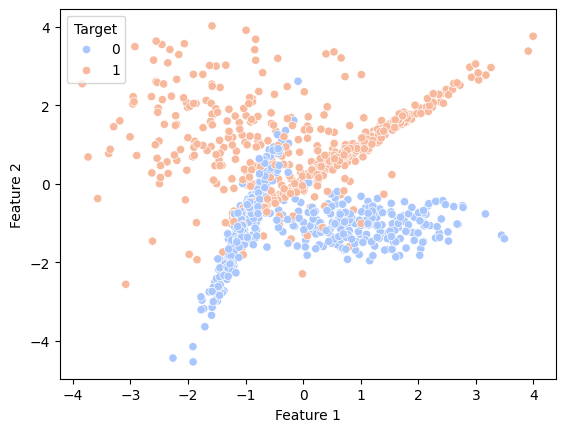

In [267]:
# Scatter plot with hue
sns.scatterplot(x="Feature 1", y="Feature 2", hue="Target", data=df, palette="coolwarm",alpha=1)

In [268]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [269]:
from sklearn.svm import SVC

In [270]:
svc=SVC(kernel='linear')

In [271]:
svc.fit(X_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [272]:
svc.coef_

array([[-0.13447368,  1.41851025]])

In [273]:
## Prediction
y_pred=svc.predict(X_test)
print(y_pred)

[1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0
 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0
 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1
 0 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1
 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1
 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0]


In [274]:
from sklearn.metrics import classification_report,confusion_matrix

In [275]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       122
           1       0.90      0.85      0.88       128

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250

[[110  12]
 [ 19 109]]


### Different kernel for overlapping dataset

#### RBF Kernel

In [276]:
rbf=SVC(kernel='rbf')

In [277]:
rbf.fit(X_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [278]:
# Prediction
y_pred1=rbf.predict(X_test)

In [279]:
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       122
           1       0.94      0.86      0.90       128

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

[[115   7]
 [ 18 110]]


#### Poly Kernel

In [280]:
polynomial=SVC(kernel='poly')
polynomial.fit(X_train,y_train)

# Prediction
y_pred2=polynomial.predict(X_test)

print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.94      0.75      0.83       122
           1       0.80      0.95      0.87       128

    accuracy                           0.85       250
   macro avg       0.87      0.85      0.85       250
weighted avg       0.87      0.85      0.85       250

[[ 91  31]
 [  6 122]]


#### Sigmoid Kernel

In [281]:
sigmoid=SVC(kernel='sigmoid')
sigmoid.fit(X_train,y_train)

# Prediction
y_pred3=sigmoid.predict(X_test)

print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       122
           1       0.75      0.78      0.76       128

    accuracy                           0.75       250
   macro avg       0.75      0.75      0.75       250
weighted avg       0.75      0.75      0.75       250

[[ 88  34]
 [ 28 100]]


In [282]:
sigmoid.intercept_

array([-0.28031585])

### Hyperparametere Tuning With SVC

In [283]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [284]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [285]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.813 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.853 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.813 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.867 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1000


In [286]:
grid.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [287]:
# Prediction
y_pred4=grid.predict(X_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       122
           1       0.97      0.85      0.91       128

    accuracy                           0.91       250
   macro avg       0.92      0.91      0.91       250
weighted avg       0.92      0.91      0.91       250

[[119   3]
 [ 19 109]]


In [288]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_dist = {
    'C': uniform(0.1, 10),          # Sample values between 0.1 and 10
    'gamma': uniform(0.001, 1),     # Sample values between 0.001 and 1
    'kernel': ['linear', 'rbf']     # Still categorical
}

random_search = RandomizedSearchCV(
    SVC(),
    param_distributions=param_dist,
    n_iter=20,        # Number of random combinations to try
    cv=5,             # 5-fold cross-validation
    verbose=3,
    random_state=42,  # for reproducibility
    refit=True
)

random_search.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END C=3.845401188473625, gamma=0.9517143064099162, kernel=linear;, score=0.860 total time=   0.0s
[CV 2/5] END C=3.845401188473625, gamma=0.9517143064099162, kernel=linear;, score=0.887 total time=   0.0s
[CV 3/5] END C=3.845401188473625, gamma=0.9517143064099162, kernel=linear;, score=0.900 total time=   0.0s
[CV 4/5] END C=3.845401188473625, gamma=0.9517143064099162, kernel=linear;, score=0.847 total time=   0.0s
[CV 5/5] END C=3.845401188473625, gamma=0.9517143064099162, kernel=linear;, score=0.807 total time=   0.0s
[CV 1/5] END C=7.896910002727692, gamma=0.597850157946487, kernel=rbf;, score=0.913 total time=   0.0s
[CV 2/5] END C=7.896910002727692, gamma=0.597850157946487, kernel=rbf;, score=0.913 total time=   0.0s
[CV 3/5] END C=7.896910002727692, gamma=0.597850157946487, kernel=rbf;, score=0.880 total time=   0.0s
[CV 4/5] END C=7.896910002727692, gamma=0.597850157946487, kernel=rbf;, score=0.933 total time

,estimator,SVC()
,param_distributions,"{'C': <scipy.stats....00269E358FBF0>, 'gamma': <scipy.stats....00269E4897AA0>, 'kernel': ['linear', 'rbf']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [289]:
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'C': np.float64(7.896910002727692), 'gamma': np.float64(0.597850157946487), 'kernel': 'rbf'}


In [290]:
# Prediction
y_pred5=random_search.predict(X_test)
print(classification_report(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89       122
           1       0.98      0.79      0.87       128

    accuracy                           0.88       250
   macro avg       0.90      0.89      0.88       250
weighted avg       0.90      0.88      0.88       250

[[120   2]
 [ 27 101]]
